# Assignment 1 Robin Schwob

## Initial jupyter declarations and imports

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [300]:
import mp1
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, SpatialDropout2D, BatchNormalization, UpSampling2D, Activation
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.callbacks import ReduceLROnPlateau
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

## Simple classification

Here we create the training dataset

In [36]:
[X_train, Y_train] = mp1.generate_dataset_classification(300, 20)

Creating data:
0
100
200


### SGD

First we test our sgd with various learning rates and plot the results in terms of loss and accuracy. Note that 3 neurons per layer is enough to train the dataset with good precision and that we use softmax activation function, as it is the one that gave us the best results. 

300/300 [==============================] - 0s 302us/step


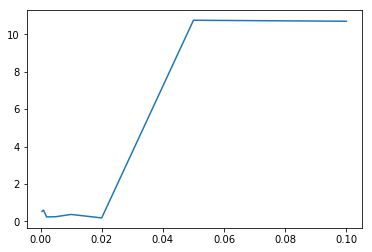

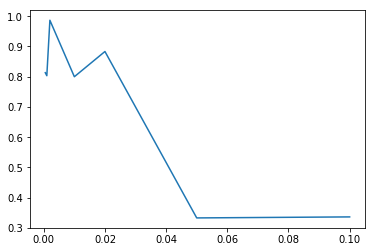

In [4]:
lrs = [0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1]
losses = []
accuracies = []
for lr in lrs:
    model = Sequential()
    n = 3
    model.add(Dense(n))
    model.add(Dense(n, activation = 'softmax'))
    sgd = SGD(lr = lr)
    model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])
    model.fit(X_train, to_categorical(Y_train), verbose = 0, epochs = 40, batch_size = 32)
    res = model.evaluate(X_train, to_categorical(Y_train))
    losses.append(res[0])
    accuracies.append(res[1])

plt.figure(1)
plt.plot(lrs, losses)
plt.figure(2)
plt.plot(lrs, accuracies)
plt.show()

We then keep the best learning rate in terms of accuracy and train a model on 50 epochs

In [5]:
i = accuracies.index(max(accuracies))
lr = lrs[i]
print(lr)
model = Sequential()
model.add(Dense(n))
model.add(Dense(n, activation = 'softmax'))
sgd = SGD(lr = lr)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])
model.fit(X_train, to_categorical(Y_train), epochs = 50, batch_size = 32)

0.002
Epoch 1/50
300/300 [==============================] - 0s 937us/step - loss: 1.1206 - acc: 0.2967
Epoch 2/50
300/300 [==============================] - 0s 88us/step - loss: 1.0725 - acc: 0.3633
Epoch 3/50
300/300 [==============================] - 0s 90us/step - loss: 1.0461 - acc: 0.4467
Epoch 4/50
300/300 [==============================] - 0s 103us/step - loss: 1.0182 - acc: 0.5167
Epoch 5/50
300/300 [==============================] - 0s 99us/step - loss: 0.9789 - acc: 0.6267
Epoch 6/50
300/300 [==============================] - 0s 90us/step - loss: 0.9466 - acc: 0.6333
Epoch 7/50
300/300 [==============================] - 0s 95us/step - loss: 0.9183 - acc: 0.6667
Epoch 8/50
300/300 [==============================] - 0s 108us/step - loss: 0.9063 - acc: 0.6900
Epoch 9/50
300/300 [==============================] - 0s 112us/step - loss: 0.8692 - acc: 0.6867
Epoch 10/50
300/300 [==============================] - 0s 108us/step - loss: 0.8516 - acc: 0.6933
Epoch 11/50
300/300 [=======

One thing to be observed is that results may vary heavily every time we train our model. Indeed, depending on how the sgd starts, it can take more than 50 epochs to  get to an acceptable accuracy (more than 95 %). Even then we have around 0.2 loss. With 100 epochs we most of the time get to a good accuracy though, but it is more difficult to compare with adam, which converges much faster. 

When the model is trained, we test it on a disk, a triangle and a rectangle to see if we get the expected results.

In [6]:
X_test = [mp1.generate_a_disk(), mp1.generate_a_triangle()[0], mp1.generate_a_rectangle()]
for x in X_test:
    x.reshape(1, x.shape[0])
X_test = np.array(X_test)/255

print("Results: ", np.argmax(model.predict(X_test), axis = 1))
print("Confidences: ", np.max(model.predict(X_test), axis = 1))

Results:  [1 2 0]
Confidences:  [0.84050995 0.96095836 0.55449986]


With 50 epochs it is not uncommon to get wrong results (even with more than 90% accuracy, disks and rectangles often get mistaken). 

We then visualize the weights as images

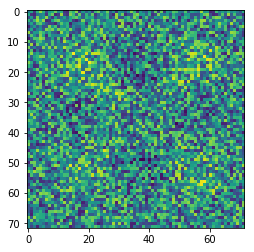

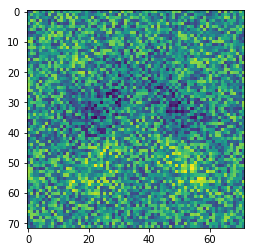

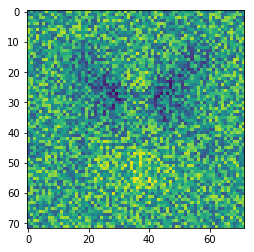

In [7]:
weights = model.get_weights()[0]
for i in range(weights.shape[1]):    
    plt.figure(i)
    plt.imshow(weights[:,i].reshape(72,72))

### Adam

We execute the same steps as with sgd with adam.

300/300 [==============================] - 0s 644us/step


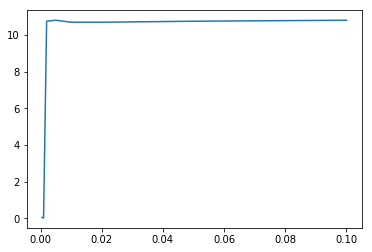

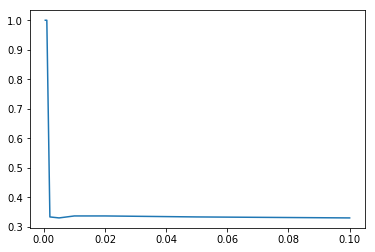

In [8]:
lrs = [0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1]
losses = []
accuracies = []
for lr in lrs:
    model = Sequential()
    n = 3
    model.add(Dense(n))
    model.add(Dense(n, activation = 'softmax'))
    adam = Adam(lr = lr)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics=['accuracy'])
    model.fit(X_train, to_categorical(Y_train), verbose = 0, epochs = 40, batch_size = 32)
    res = model.evaluate(X_train, to_categorical(Y_train))
    losses.append(res[0])
    accuracies.append(res[1])

plt.figure(1)
plt.plot(lrs, losses)
plt.figure(2)
plt.plot(lrs, accuracies)
plt.show()

In [9]:
i = accuracies.index(max(accuracies))
lr = lrs[i]
print(lr)

model = Sequential()
model.add(Dense(n))
model.add(Dense(n, activation = 'softmax'))
adam = Adam(lr = lr)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics=['accuracy'])
model.fit(X_train, to_categorical(Y_train), epochs = 50, batch_size = 32)

0.0005
Epoch 1/50
300/300 [==============================] - 1s 2ms/step - loss: 1.0763 - acc: 0.4200
Epoch 2/50
300/300 [==============================] - 0s 119us/step - loss: 0.8967 - acc: 0.5833
Epoch 3/50
300/300 [==============================] - 0s 117us/step - loss: 0.7586 - acc: 0.7167
Epoch 4/50
300/300 [==============================] - 0s 162us/step - loss: 0.6795 - acc: 0.7833
Epoch 5/50
300/300 [==============================] - 0s 115us/step - loss: 0.5898 - acc: 0.8233
Epoch 6/50
300/300 [==============================] - 0s 105us/step - loss: 0.5049 - acc: 0.8633
Epoch 7/50
300/300 [==============================] - 0s 125us/step - loss: 0.4541 - acc: 0.8800
Epoch 8/50
300/300 [==============================] - 0s 111us/step - loss: 0.4265 - acc: 0.8867
Epoch 9/50
300/300 [==============================] - 0s 108us/step - loss: 0.3715 - acc: 0.9267
Epoch 10/50
300/300 [==============================] - 0s 104us/step - loss: 0.3338 - acc: 0.9500
Epoch 11/50
300/300 [===

Here we notice that adam converges much faster than sgd, as we always get to 100 % accuracy and around 0.05 loss within 50 epochs. 

We expect these results to transfer to test set.

In [10]:
X_test = [mp1.generate_a_disk(), mp1.generate_a_triangle()[0], mp1.generate_a_rectangle()]
for x in X_test:
    x.reshape(1, x.shape[0])
X_test = np.array(X_test)/255

print("Results: ", np.argmax(model.predict(X_test), axis = 1))
print("Confidences: ", np.max(model.predict(X_test), axis = 1))

Results:  [1 2 0]
Confidences:  [0.9904365  0.99748105 0.9507117 ]


With adam we always get the right results with a 50-epochs trained model. In exactly the same conditions, it works much better then sgd.

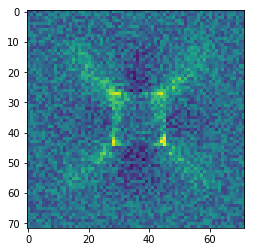

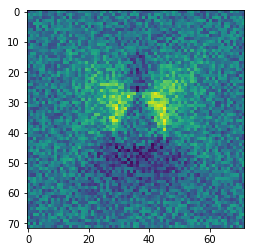

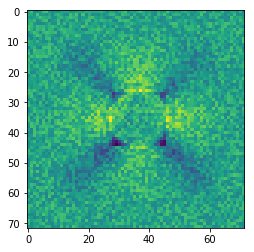

In [11]:
weights = model.get_weights()[0]
for i in range(weights.shape[1]):    
    plt.figure(i)
    plt.imshow(weights[:,i].reshape(72,72))

## A more difficult classification problem

### Dataset generation

In [12]:
[X_train, Y_train] = mp1.generate_dataset_classification(1000, 20, True)
[X_test, Y_test] = mp1.generate_test_set_classification()

Creating data:
0
100
200
300
400
500
600
700
800
900
Creating data:
0
100
200


### Tryouts with adam optimizer

We use the same idea as before to train a 2-layer network using adam optimizer.

1000/1000 [==============================] - 0s 418us/step


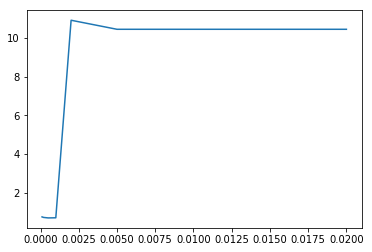

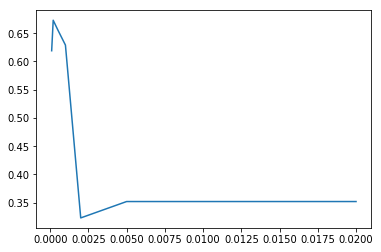

In [13]:
lrs = [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02]
losses = []
accuracies = []
for lr in lrs:
    model = Sequential()
    n = 3
    model.add(Dense(n))
    model.add(Dense(n, activation = 'softmax'))
    adam = Adam(lr = lr)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics=['accuracy'])
    model.fit(X_train, to_categorical(Y_train), verbose = 0, epochs = 40, batch_size = 32)
    res = model.evaluate(X_train, to_categorical(Y_train))
    losses.append(res[0])
    accuracies.append(res[1])

plt.figure(1)
plt.plot(lrs, losses)
plt.figure(2)
plt.plot(lrs, accuracies)
plt.show()

Here the best learning rate gives us around 65% accuracy, which is quite bad.

Let's still try to train it with 100 epochs to see where it can go.

In [14]:
i = accuracies.index(max(accuracies))
lr = lrs[i]
print(lr)

model = Sequential()
model.add(Dense(n))
model.add(Dense(n, activation = 'softmax'))
adam = Adam(lr = lr)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics=['accuracy'])
model.fit(X_train, to_categorical(Y_train), epochs = 100, batch_size = 32)

0.0002
Epoch 1/100
1000/1000 [==============================] - 1s 1ms/step - loss: 1.1057 - acc: 0.4000
Epoch 2/100
1000/1000 [==============================] - 0s 111us/step - loss: 0.9770 - acc: 0.4820
Epoch 3/100
1000/1000 [==============================] - 0s 92us/step - loss: 0.9298 - acc: 0.5250
Epoch 4/100
1000/1000 [==============================] - 0s 88us/step - loss: 0.9160 - acc: 0.5080
Epoch 5/100
1000/1000 [==============================] - 0s 83us/step - loss: 0.8768 - acc: 0.5450
Epoch 6/100
1000/1000 [==============================] - 0s 89us/step - loss: 0.8455 - acc: 0.5610
Epoch 7/100
1000/1000 [==============================] - 0s 86us/step - loss: 0.8426 - acc: 0.5680
Epoch 8/100
1000/1000 [==============================] - 0s 84us/step - loss: 0.8423 - acc: 0.5710
Epoch 9/100
1000/1000 [==============================] - 0s 90us/step - loss: 0.8180 - acc: 0.5680
Epoch 10/100
1000/1000 [==============================] - 0s 118us/step - loss: 0.8713 - acc: 0.5610
E

1000/1000 [==============================] - 0s 82us/step - loss: 0.6880 - acc: 0.6560
Epoch 83/100
1000/1000 [==============================] - 0s 78us/step - loss: 0.6629 - acc: 0.6600
Epoch 84/100
1000/1000 [==============================] - 0s 76us/step - loss: 0.6917 - acc: 0.6440
Epoch 85/100
1000/1000 [==============================] - 0s 86us/step - loss: 0.6902 - acc: 0.6560
Epoch 86/100
1000/1000 [==============================] - 0s 99us/step - loss: 0.6544 - acc: 0.6930
Epoch 87/100
1000/1000 [==============================] - 0s 100us/step - loss: 0.6734 - acc: 0.6510
Epoch 88/100
1000/1000 [==============================] - 0s 88us/step - loss: 0.6619 - acc: 0.6850
Epoch 89/100
1000/1000 [==============================] - 0s 82us/step - loss: 0.6751 - acc: 0.6800
Epoch 90/100
1000/1000 [==============================] - 0s 79us/step - loss: 0.6541 - acc: 0.6690
Epoch 91/100
1000/1000 [==============================] - 0s 75us/step - loss: 0.6880 - acc: 0.6530
Epoch 92/100

We don't get much better than 65% accuracy even with 100 epochs, meaning that our model stops converging at this point. It is probable that we need to use more layers or more neurons per layer to train it more efficiently. 

Let's still see what are the results on the test set.

In [15]:
model.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 1ms/step


[0.7794585919380188, 0.6033333325386048]

As expected, results are quite bad and we get around 60% accuracy, which is quite poor.

### CNN

We now want to train a not very deep CNN with adam optimizer to see if we get better results. To do that we have to reshape our train and test sets.

In [16]:
X_train = X_train.reshape(X_train.shape[0], 72, 72, 1)
X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)

We then try again different learning rates with 40 epochs.

1000/1000 [==============================] - 1s 1ms/step


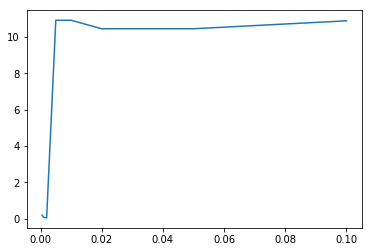

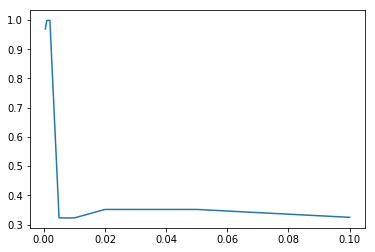

In [17]:
lrs = [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02]
losses = []
accuracies = []
for lr in lrs:
    model = Sequential()
    model.add(Conv2D(16, (5, 5), input_shape = (72, 72, 1)))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(3, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = lr), metrics = ['accuracy'])
    model.fit(X_train, to_categorical(Y_train), verbose = 0, epochs = 40, batch_size = 32)
    
    res = model.evaluate(X_train, to_categorical(Y_train))
    losses.append(res[0])
    accuracies.append(res[1])

plt.figure(1)
plt.plot(lrs, losses)
plt.figure(2)
plt.plot(lrs, accuracies)
plt.show()

First thing we notice is that it is very long, which is logical as we go from 2 layers to 5 layers, with a convolutional layer which is much more complex than a dense layer. It therefore takes several minutes to get our results.

After some time we see that we manage to get 100% accuracy on training set with a specific learning rate. There is probably some overfitting involved but I tried to limit it using a dropout layer.

In [21]:
i = accuracies.index(max(accuracies))
lr = lrs[i]
print(lr)

model = Sequential()
model.add(Conv2D(16, (5, 5), input_shape = (72, 72, 1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = lr), metrics = ['accuracy'])
model.fit(X_train, to_categorical(Y_train), epochs = 50, batch_size = 32)

0.002
Epoch 1/50
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4537 - acc: 0.4320
Epoch 2/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.8258 - acc: 0.6410
Epoch 3/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.7464 - acc: 0.6840
Epoch 4/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6278 - acc: 0.7870
Epoch 5/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5771 - acc: 0.7910
Epoch 6/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5341 - acc: 0.8140
Epoch 7/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4947 - acc: 0.8310
Epoch 8/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4605 - acc: 0.8510A: 1s - loss: 
Epoch 9/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4256 - acc: 0.8600
Epoch 10/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4274 - acc: 0.8420
Epoch 11/

We indeed manage to get around 100% accuracy within 50 epochs, with a loss around 0.05 (like dense adam for the simpler problem). We should still wonder how much this model is overfitting, so let's try the model on the test set.

In [22]:
model.evaluate(X_test, Y_test)

300/300 [==============================] - 1s 3ms/step


[0.5279745093981425, 0.8533333325386048]

We notice a huge drop in accuracy (15%) and a huge increase in loss (x10), as the model is probably overfitting. It is still an ok result, but we may be able to do better with less epochs for instance. Let's try it with 20 epochs, which is enough to get around 95% accuracy on the train set. 

In [29]:
model = Sequential()
model.add(Conv2D(16, (5, 5), input_shape = (72, 72, 1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = lr), metrics = ['accuracy'])
model.fit(X_train, to_categorical(Y_train), epochs = 20, batch_size = 32)

Epoch 1/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5267 - acc: 0.4590
Epoch 2/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.7848 - acc: 0.6740
Epoch 3/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.7590 - acc: 0.6610
Epoch 4/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6424 - acc: 0.7490
Epoch 5/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5601 - acc: 0.8240
Epoch 6/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5093 - acc: 0.8310
Epoch 7/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4852 - acc: 0.8300
Epoch 8/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4410 - acc: 0.8610
Epoch 9/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4039 - acc: 0.8710
Epoch 10/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3615 - acc: 0.8930
Epoch 11/20
1000/1000 [======

In [30]:
model.evaluate(X_test, Y_test)

300/300 [==============================] - 1s 4ms/step


[0.5080923144022623, 0.8333333325386048]

We get a very similar result here, proving that more epochs just lead to more overfitting but not to better results on the test set. We do a last try with 15 epochs.

In [25]:
model = Sequential()
model.add(Conv2D(16, (5, 5), input_shape = (72, 72, 1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = lr), metrics = ['accuracy'])
model.fit(X_train, to_categorical(Y_train), epochs = 15, batch_size = 32)

Epoch 1/15
1000/1000 [==============================] - 4s 4ms/step - loss: 2.2947 - acc: 0.3720
Epoch 2/15
1000/1000 [==============================] - 2s 2ms/step - loss: 0.9187 - acc: 0.5660
Epoch 3/15
1000/1000 [==============================] - 2s 2ms/step - loss: 0.7375 - acc: 0.6970
Epoch 4/15
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6619 - acc: 0.7480A: 0s - loss: 0.6654
Epoch 5/15
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6001 - acc: 0.7840
Epoch 6/15
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5542 - acc: 0.8040A: 1s - 
Epoch 7/15
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5233 - acc: 0.8270
Epoch 8/15
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4793 - acc: 0.8560
Epoch 9/15
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4687 - acc: 0.8340
Epoch 10/15
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4284 - acc: 0.8670
E

In [26]:
model.evaluate(X_test, Y_test)

300/300 [==============================] - 1s 3ms/step


[0.5626809020837148, 0.7833333325386047]

Here the accuracy drops quite a lot, which means that going to 20 epochs actually helps getting better on test set. All this to illustrate the difficulty created by overfitting and the necessity to not only find the right parameters, but also the right model for our problem. Various ways to counter that are : 
* Use a larger dataset (I tried 3000 images, the results were much more convincing. It is a bit cheating though as we almost get every image that can be created by the generate_a_drawing function with as many images).
* Change the model : add layers, use different convolutional layers, change max pooling parameters, add more dropout, etc.
* Try different activation functions
* Try different optimizers

## A regression problem

Here we create the datasets. To be noted that I made some trys with 1000 training samples but the results were not much better, therefore I in the end sticked with 300.

In [264]:
[X_train, Y_train] = mp1.generate_dataset_regression(300, 20)
[X_test, Y_test] = mp1.generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


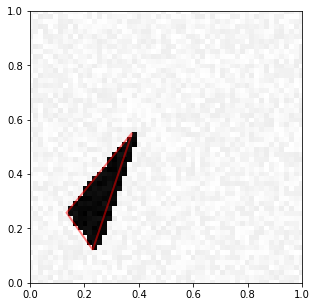

In [265]:
mp1.visualize_prediction(X_train[0], Y_train[0])

Here we reshape the data. X matrices are reshaped so that they can be put as input to a CNN. Y vectors are reshaped so that they are ordered by increasing absciss.

In [266]:
X_train = X_train.reshape(X_train.shape[0], 72, 72, 1)
X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)

Y_train_bis = np.copy(Y_train)
for i in range(Y_train.shape[0]):
    l = Y_train[i, [0, 2, 4]]
    idx = np.argsort(l)
    for j in range(3):
        Y_train_bis[i, 2 * j] = Y_train[i, 2 * idx[j]]
        Y_train_bis[i, 2 * j + 1] = Y_train[i, 2 * idx[j] + 1]
Y_train = np.copy(Y_train_bis)

Y_test_bis = np.copy(Y_test)
for i in range(Y_test.shape[0]):
    l = Y_test[i, [0, 2, 4]]
    idx = np.argsort(l)
    for j in range(3):
        Y_test_bis[i, 2 * j] = Y_test[i, 2 * idx[j]]
        Y_test_bis[i, 2 * j + 1] = Y_test[i, 2 * idx[j] + 1]
Y_test = np.copy(Y_test_bis)

(300, 72, 72, 1)


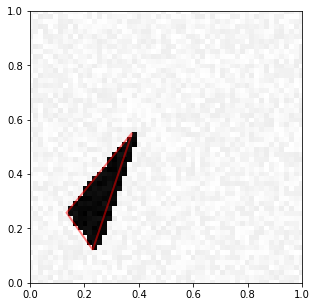

In [267]:
print(X_train.shape)
mp1.visualize_prediction(X_train[0].reshape(72 * 72, 1), Y_train[0])

After some tests this is this strategy that game me the best results : create a model that contains 3 models, one for each vertex. We then train them separately and merge the results to have our predictions.

In [268]:
class Model():
    def __init__(self):
        model1 = Sequential()
        model2 = Sequential()
        model3 = Sequential()
        self.models = [model1, model2, model3]

    def add(self, layers):
        for i in range(len(self.models)):
            self.models[i].add(layers[i])
    
    def compile(self, loss = 'mean_squared_error', lr = 0.0001, decay = 0.000002, metrics = ['accuracy']):
        for model in self.models:
            model.compile(loss = loss, optimizer = Adam(lr = lr, decay = decay), metrics = metrics)
    
    def fit(self, X, y, epochs, batch_size = 32):
        for i in range(len(self.models)):
            self.models[i].fit(X, y[:, 2 * i: 2 * (i + 1)], epochs = epochs, batch_size = batch_size)
            
    def predict(self, X):
        prediction = []
        for model in self.models:
            prediction += model.predict(X)[0].tolist()
        return np.array(prediction)
    
    def evaluate(self, X, y):
        evaluations = []
        for i in range(len(self.models)):
            evaluations.append(self.models[i].evaluate(X, y[:, 2 * i: 2 * (i + 1)]))
        return np.mean(evaluations, axis = 0)

We basically use the same model as the one for classification, except that we use a relu as activation function, as softmax was always giving us 3 aligned points as vertices, which is quite logical as we want outputs between 0 and 1 and not anymore between O and 2. 

In [273]:
n = 2

model = Model()
model.add([Conv2D(16, (5, 5), input_shape = (72, 72, 1), activation = 'relu') for _ in range(3)])
model.add([MaxPooling2D() for _ in range(3)])
model.add([Flatten() for _ in range(3)])
model.add([Dropout(0.5) for _ in range(3)])
model.add([Dense(n, activation = 'relu') for _ in range(3)])
model.compile()
model.fit(X_train, Y_train, epochs = 200)

Epoch 1/200
300/300 [==============================] - 14s 46ms/step - loss: 0.1460 - acc: 0.6533
Epoch 2/200
300/300 [==============================] - 1s 2ms/step - loss: 0.1370 - acc: 0.6867
Epoch 3/200
300/300 [==============================] - 1s 2ms/step - loss: 0.1183 - acc: 0.6867
Epoch 4/200
300/300 [==============================] - 1s 2ms/step - loss: 0.1165 - acc: 0.6967
Epoch 5/200
300/300 [==============================] - 1s 2ms/step - loss: 0.1014 - acc: 0.7100
Epoch 6/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0925 - acc: 0.7167
Epoch 7/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0883 - acc: 0.7033
Epoch 8/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0826 - acc: 0.6900
Epoch 9/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0715 - acc: 0.7267
Epoch 10/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0651 - acc: 0.7133
Epoch 11/200
300/300 [===============

300/300 [==============================] - 1s 2ms/step - loss: 0.0076 - acc: 0.8800
Epoch 86/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0070 - acc: 0.8967
Epoch 87/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0074 - acc: 0.8833
Epoch 88/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0073 - acc: 0.9067
Epoch 89/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0078 - acc: 0.9133
Epoch 90/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0078 - acc: 0.8833
Epoch 91/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0074 - acc: 0.9300
Epoch 92/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0069 - acc: 0.8900
Epoch 93/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0065 - acc: 0.9200
Epoch 94/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0071 - acc: 0.9133
Epoch 95/200
300/300 [=====================

300/300 [==============================] - 1s 3ms/step - loss: 0.0041 - acc: 0.9333
Epoch 169/200
300/300 [==============================] - 1s 3ms/step - loss: 0.0042 - acc: 0.9267
Epoch 170/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0039 - acc: 0.9167
Epoch 171/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0041 - acc: 0.9167
Epoch 172/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0040 - acc: 0.9367
Epoch 173/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0040 - acc: 0.9467
Epoch 174/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0045 - acc: 0.9100
Epoch 175/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0046 - acc: 0.9300
Epoch 176/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0040 - acc: 0.9233
Epoch 177/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0043 - acc: 0.9167
Epoch 178/200
300/300 [===========

300/300 [==============================] - 1s 2ms/step - loss: 0.0230 - acc: 0.7933
Epoch 53/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0218 - acc: 0.8167
Epoch 54/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0214 - acc: 0.8067
Epoch 55/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0210 - acc: 0.8033
Epoch 56/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0216 - acc: 0.8067
Epoch 57/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0209 - acc: 0.8133
Epoch 58/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0204 - acc: 0.8133
Epoch 59/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0200 - acc: 0.8033
Epoch 60/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0179 - acc: 0.8200
Epoch 61/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0190 - acc: 0.8167
Epoch 62/200
300/300 [=====================

300/300 [==============================] - 1s 2ms/step - loss: 0.0102 - acc: 0.8967
Epoch 137/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0112 - acc: 0.8700
Epoch 138/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0097 - acc: 0.8767
Epoch 139/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0100 - acc: 0.8867
Epoch 140/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0087 - acc: 0.8933
Epoch 141/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0095 - acc: 0.9000
Epoch 142/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0091 - acc: 0.9100
Epoch 143/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0094 - acc: 0.8867
Epoch 144/200
300/300 [==============================] - 1s 3ms/step - loss: 0.0100 - acc: 0.9000
Epoch 145/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0099 - acc: 0.9133
Epoch 146/200
300/300 [===========

300/300 [==============================] - 1s 2ms/step - loss: 0.0448 - acc: 0.7500
Epoch 20/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0403 - acc: 0.7533
Epoch 21/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0401 - acc: 0.7467
Epoch 22/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0372 - acc: 0.7333
Epoch 23/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0336 - acc: 0.7567
Epoch 24/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0325 - acc: 0.7667
Epoch 25/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0303 - acc: 0.7867
Epoch 26/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0272 - acc: 0.8067
Epoch 27/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0252 - acc: 0.7933
Epoch 28/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0245 - acc: 0.8233
Epoch 29/200
300/300 [=====================

300/300 [==============================] - 1s 2ms/step - loss: 0.0068 - acc: 0.8933
Epoch 104/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0071 - acc: 0.9100
Epoch 105/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0067 - acc: 0.9167
Epoch 106/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0064 - acc: 0.9000
Epoch 107/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0064 - acc: 0.9200
Epoch 108/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0071 - acc: 0.9200
Epoch 109/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0067 - acc: 0.9000
Epoch 110/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0065 - acc: 0.8933
Epoch 111/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0075 - acc: 0.8833
Epoch 112/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0067 - acc: 0.8900
Epoch 113/200
300/300 [===========

300/300 [==============================] - 1s 2ms/step - loss: 0.0044 - acc: 0.9200
Epoch 187/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0042 - acc: 0.9367
Epoch 188/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0043 - acc: 0.9267
Epoch 189/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0042 - acc: 0.9133
Epoch 190/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0046 - acc: 0.9267
Epoch 191/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0044 - acc: 0.9233
Epoch 192/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0043 - acc: 0.9333
Epoch 193/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0041 - acc: 0.9100
Epoch 194/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0042 - acc: 0.9233
Epoch 195/200
300/300 [==============================] - 1s 2ms/step - loss: 0.0043 - acc: 0.9400
Epoch 196/200
300/300 [===========

We can observe than we manage to get to around 95% accuracy for each vertex, with a loss around 0.005, which is quite good.

We can then visualize 10 predictions from the training sets. We notice that some triangles (often the well-centered and the big ones) are well recognized, while those that are close to the borders, small or flat often give wrong results.

[0.1343543  0.25776337 0.23057967 0.12172033 0.3755772  0.55186464]
[0.14082946 0.26078385 0.22459252 0.12763762 0.38002992 0.53464496]


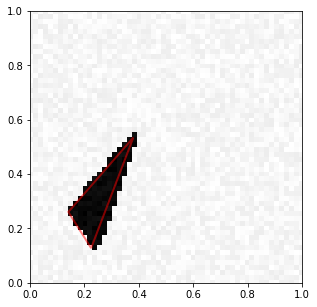

[0.50074568 0.27670519 0.87953516 0.33827311 0.88887473 0.57451987]
[0.50424826 0.26428142 0.78906626 0.29903856 0.87167066 0.57701987]


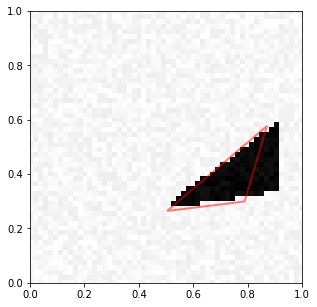

[0.67069742 0.62972895 0.77280491 0.88621603 0.8109735  0.57602282]
[0.6236043  0.60414892 0.72963023 0.75955361 0.7704981  0.56861913]


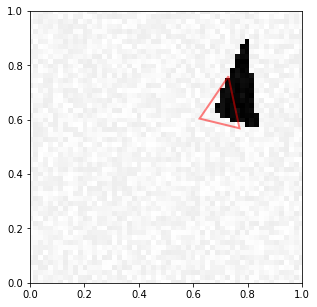

[0.45190974 0.64100066 0.56350393 0.8275169  0.60316804 0.39724673]
[0.44598505 0.64430207 0.53504318 0.69464904 0.58134741 0.45260802]


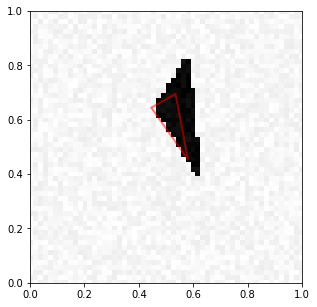

[0.23836921 0.46762535 0.45590081 0.99009013 0.84677602 0.9703038 ]
[0.24054253 0.47589636 0.44724473 0.99087417 0.83650172 0.92212909]


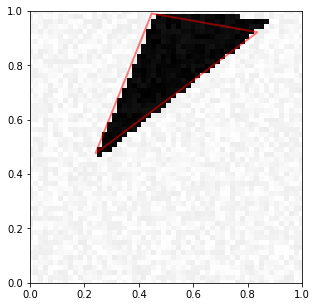

[0.00607908 0.06521185 0.20293495 0.04382128 0.7512741  0.06244808]
[0.         0.         0.1988187  0.03618382 0.73125273 0.03272308]


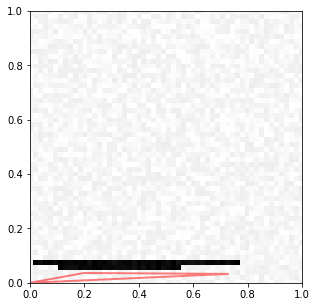

[0.53793496 0.2381109  0.56932848 0.06791694 0.60864696 0.22214868]
[0.51081395 0.29805186 0.51107997 0.11639509 0.58845425 0.28149828]


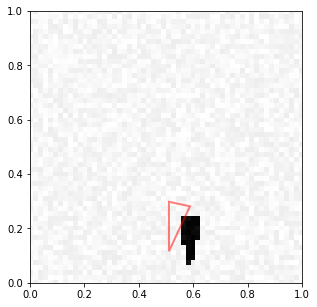

[0.01587696 0.27408478 0.61294285 0.06824603 0.63859768 0.14094178]
[0.         0.27897251 0.54298687 0.10751344 0.627267   0.1273483 ]


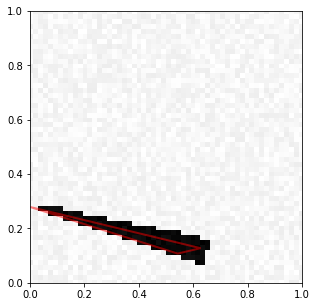

[0.19582572 0.13735011 0.24035037 0.6228253  0.31393409 0.70189048]
[0.17371461 0.19535357 0.21106802 0.51318246 0.32879391 0.68453521]


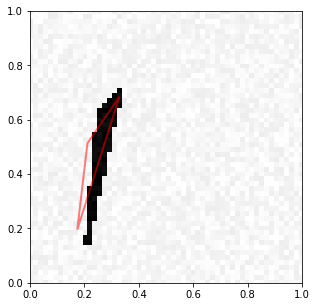

[0.87234127 0.08422169 0.90813344 0.05354099 0.98024931 0.11706118]
[0.76713306 0.17881778 0.73268944 0.15758194 0.88553762 0.11399404]


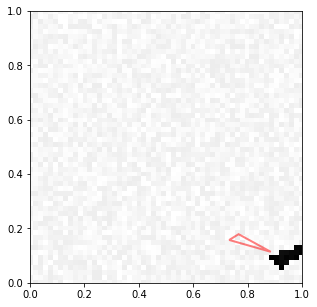

In [274]:
for i in range(10):
    prediction = model.predict(X_train[i].reshape(1, 72, 72, 1))
    print(Y_train[i])
    print(prediction)
    mp1.visualize_prediction(X_train[i].reshape(72 * 72, 1), prediction)

Let's now see what results we get for the test set.

In [275]:
model.evaluate(X_test, Y_test)

300/300 [==============================] - 6s 21ms/step


array([0.03228817, 0.78888889])

Accuracy and loss get a bit worse as we could expect due to overfitting, but results are still ok, which we can visualize on the following predictions, as some of them are quite accurate.

[0.36340393 0.33217252 0.67661723 0.27556678 0.94133439 0.93818117]
[0.35919318 0.3561106  0.82417309 0.39219883 1.018785   0.73450625]


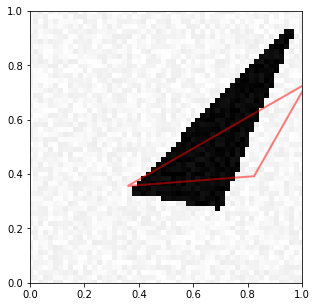

[0.17839825 0.77686033 0.49350036 0.81401674 0.51306942 0.78858177]
[0.29477978 0.61591643 0.36360246 0.54640669 0.50603354 0.47130871]


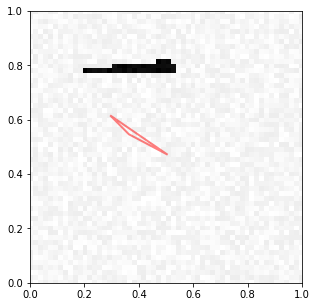

[0.23325432 0.15415605 0.32182751 0.87390724 0.5149824  0.45317341]
[0.20966154 0.28369078 0.37326577 0.72559541 0.49006784 0.50987339]


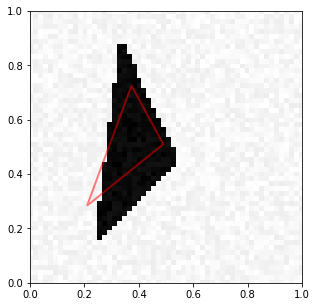

[0.16213195 0.84262262 0.57681979 0.58680997 0.91139454 0.37708317]
[0.33655706 0.78778827 0.67197269 0.67817873 0.80242002 0.37533754]


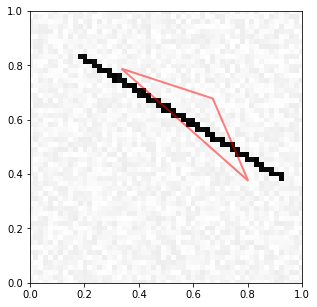

[0.73548441 0.45606621 0.88877703 0.05455311 0.90340186 0.74689834]
[0.76293004 0.34004846 0.8734228  0.30574688 1.00741708 0.52391374]


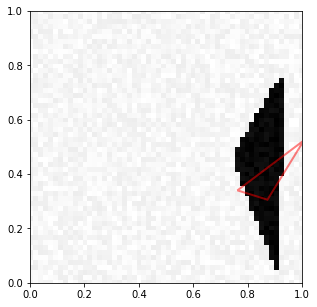

[0.39686117 0.68093838 0.77639342 0.5454629  0.90700812 0.09480827]
[0.40402499 0.52271831 0.67848253 0.61874151 0.86531931 0.25180933]


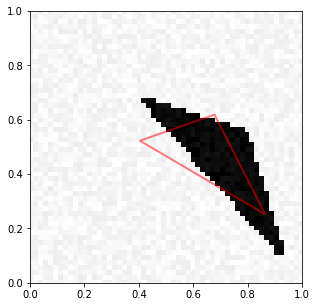

[0.11002962 0.9821957  0.38897812 0.65559303 0.99000801 0.48365552]
[0.2523402  1.05977058 0.72591728 0.79553276 0.91561538 0.54030776]


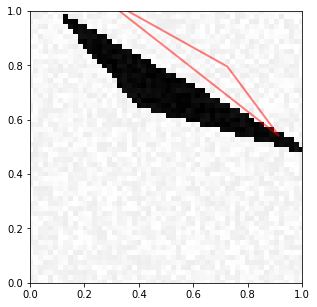

[0.20474728 0.92011873 0.52210146 0.59545851 0.74751949 0.55935637]
[0.19531322 0.91065335 0.5713523  0.52286673 0.64365524 0.58885705]


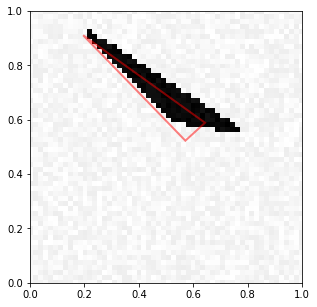

[0.00887329 0.87257706 0.77154584 0.00714704 0.8403276  0.14630711]
[0.         0.60485959 0.5141964  0.59631002 0.76063842 0.        ]


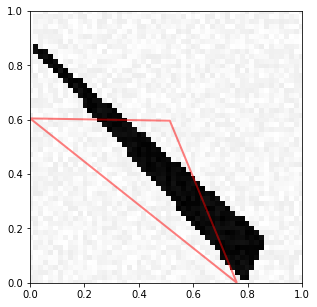

[0.37436498 0.80601878 0.38379868 0.90312727 0.53752479 0.4952376 ]
[0.33627868 0.67429572 0.45005783 0.59747428 0.56686735 0.51861525]


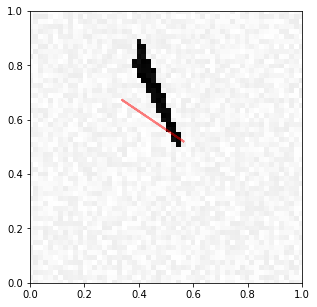

In [276]:
for i in range(10):
    prediction = model.predict(X_test[i].reshape(1, 72, 72, 1))
    print(Y_test[i])
    print(prediction)
    mp1.visualize_prediction(X_test[i].reshape(72 * 72, 1), prediction)

We see that the results are always a bit wrong, but always quite close. A more complex model like UNet or SegNet could probably help us tackle this, but my laptop is taking too long to train them efficiently.

## Image denoising

I modified the corresponding functions so that we can directly create the dataset using the generate_dataset_classification function.

In [317]:
[X_train, Y_train] = mp1.generate_dataset_classification(300, 50, True, True)
[X_test, Y_test] = mp1.generate_dataset_classification(300, 50, True, True)

Creating data:
0
100
200
Creating data:
0
100
200


In [318]:
X_train = X_train.reshape(X_train.shape[0], 72, 72, 1)
Y_train = Y_train.reshape(Y_train.shape[0], 72, 72, 1)
X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)
Y_test = Y_test.reshape(Y_test.shape[0], 72, 72, 1)

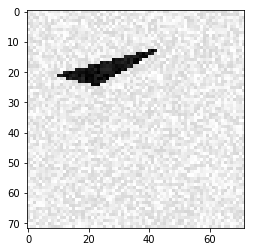

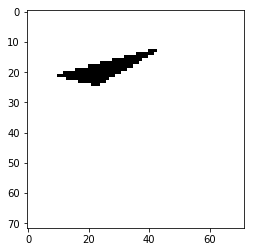

In [319]:
plt.figure(0)
plt.imshow(X_train[0, :, :, 0], cmap='gray')
plt.figure(1)
plt.imshow(Y_train[0, :, :, 0], cmap='gray')

We train a very basic hourglass model to encode and decode the image in order to denoise it.

In [328]:
model = Sequential()

model.add(Conv2D(72, (3, 3), input_shape = (72, 72, 1), padding = 'same'))
print(model.output_shape)
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())
print(model.output_shape)

model.add(Conv2D(72, (3, 3), padding = 'same'))
print(model.output_shape)
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(UpSampling2D())
print(model.output_shape)
model.add(Conv2D(1, (3, 3), padding = 'same'))
print(model.output_shape)
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, Y_train, epochs = 50, batch_size = 32)

(None, 72, 72, 72)
(None, 36, 36, 72)
(None, 36, 36, 72)
(None, 72, 72, 72)
(None, 72, 72, 1)
Epoch 1/50
300/300 [==============================] - 42s 141ms/step - loss: 0.1707 - acc: 0.9094
Epoch 2/50
300/300 [==============================] - 15s 50ms/step - loss: 0.1591 - acc: 0.9697
Epoch 3/50
300/300 [==============================] - 16s 52ms/step - loss: 0.1558 - acc: 0.9782
Epoch 4/50
300/300 [==============================] - 16s 52ms/step - loss: 0.1531 - acc: 0.9823
Epoch 5/50
300/300 [==============================] - 17s 57ms/step - loss: 0.1502 - acc: 0.9857
Epoch 6/50
300/300 [==============================] - 15s 51ms/step - loss: 0.1477 - acc: 0.9879
Epoch 7/50
300/300 [==============================] - 15s 51ms/step - loss: 0.1451 - acc: 0.9890
Epoch 8/50
300/300 [==============================] - 15s 50ms/step - loss: 0.1431 - acc: 0.9896
Epoch 9/50
300/300 [==============================] - 16s 53ms/step - loss: 0.1406 - acc: 0.9904
Epoch 10/50
300/300 [===========

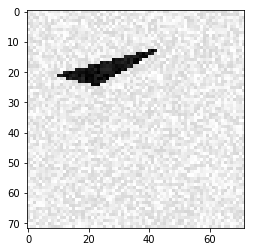

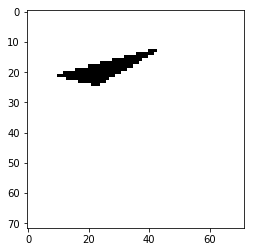

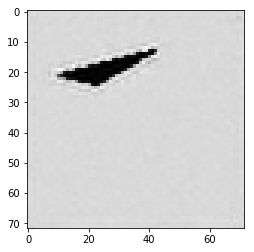

In [329]:
plt.figure(0)
plt.imshow(X_train[0, :, :, 0], cmap='gray')
plt.figure(1)
plt.imshow(Y_train[0, :, :, 0], cmap='gray')
plt.figure(2)
plt.imshow(model.predict(X_train[0, :, :, 0].reshape(1, 72, 72, 1))[0, :, :, 0], cmap='gray')

In [330]:
model.evaluate(X_test, Y_test)

300/300 [==============================] - 11s 35ms/step


[0.08400301297505697, 0.9993743602434794]

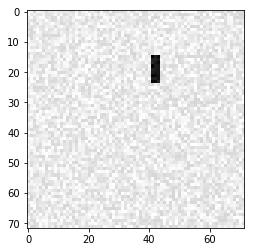

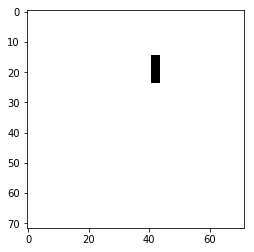

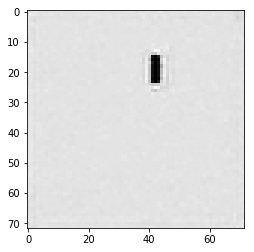

In [331]:
plt.figure(0)
plt.imshow(X_test[0, :, :, 0], cmap='gray')
plt.figure(1)
plt.imshow(Y_test[0, :, :, 0], cmap='gray')
plt.figure(2)
plt.imshow(model.predict(X_test[0, :, :, 0].reshape(1, 72, 72, 1))[0, :, :, 0], cmap='gray')

Results are quite good in terms of loss and accuracy, and the we notice that the background gets unified in a light gray. The figure gets a bit blurry though and we do not exactly get the original denoised figure.